In [1]:
import numpy as np
from keras.datasets import mnist 
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
(x_train , _) , (x_test , _) = mnist.load_data()

x_train = x_train.astype('float32') /255.
x_test = x_test.astype('float32') /255.

x_train = np.reshape(x_train , (len(x_train) , 28 , 28 , 1))
x_test = np.reshape(x_test , (len(x_test) , 28 , 28 , 1))

noise_f = 0.7
x_train_n = x_train + noise_f*np.random.normal(loc = 0.0 , scale = 1.0 ,size = x_train.shape )
x_test_n = x_test + noise_f*np.random.normal(loc = 0.0 , scale = 1.0 , size = x_test.shape )

x_train_n = np.clip(x_train_n , 0. , 1.)
x_test_n = np.clip(x_test_n , 0. , 1.)

11264000/11490434 [============================>.] - ETA: 0s

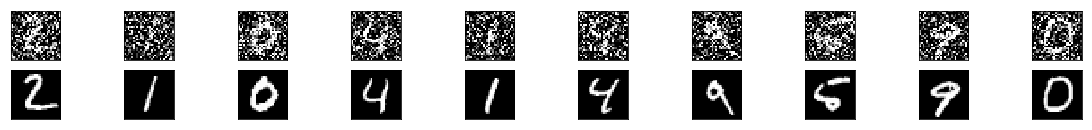

In [3]:
n = 10
plt.figure(figsize = (20,2))
for i in range(1,n+1) :
	ax = plt.subplot(2,n,i)
	plt.imshow(x_test_n[i].reshape(28,28))
	plt.gray()
	ax.get_xaxis().set_visible(False)
	ax.get_yaxis().set_visible(False)
	bx = plt.subplot(2,n,i+n)
	plt.imshow(x_test[i].reshape((28,28)))
	plt.gray()
	bx.get_xaxis().set_visible(False)
	bx.get_yaxis().set_visible(False)
plt.show()



In [7]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy' , metrics = ['acc'])



In [8]:
autoencoder.fit(x_train_n, x_train,
                epochs=100,
                batch_size=512,
                shuffle=True,
                validation_data=(x_test_n, x_test))
                # callbacks=[TensorBoard(log_dir='/tmp/tb',
                # histogram_freq=0, 
                # write_graph=False)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s - loss: 0.3495 - acc: 0.8031 - val_loss: 0.2296 - val_acc: 0.8073
Epoch 2/100
60000/60000 [==============================] - 6s - loss: 0.2061 - acc: 0.7971 - val_loss: 0.1848 - val_acc: 0.8034
Epoch 3/100
60000/60000 [==============================] - 6s - loss: 0.1785 - acc: 0.7994 - val_loss: 0.1718 - val_acc: 0.8053
Epoch 4/100
60000/60000 [==============================] - 6s - loss: 0.1674 - acc: 0.8017 - val_loss: 0.1628 - val_acc: 0.8067
Epoch 5/100
60000/60000 [==============================] - 6s - loss: 0.1601 - acc: 0.8031 - val_loss: 0.1539 - val_acc: 0.8065
Epoch 6/100
60000/60000 [==============================] - 6s - loss: 0.1546 - acc: 0.8041 - val_loss: 0.1517 - val_acc: 0.8077
Epoch 7/100
60000/60000 [==============================] - 6s - loss: 0.1507 - acc: 0.8049 - val_loss: 0.1482 - val_acc: 0.8080
Epoch 8/100
60000/60000 [=============================

60000/60000 [==============================] - 6s - loss: 0.1237 - acc: 0.8097 - val_loss: 0.1226 - val_acc: 0.8079
Epoch 65/100
60000/60000 [==============================] - 6s - loss: 0.1239 - acc: 0.8097 - val_loss: 0.1228 - val_acc: 0.8080
Epoch 66/100
60000/60000 [==============================] - 6s - loss: 0.1238 - acc: 0.8097 - val_loss: 0.1237 - val_acc: 0.8101
Epoch 67/100
60000/60000 [==============================] - 6s - loss: 0.1236 - acc: 0.8097 - val_loss: 0.1229 - val_acc: 0.8076
Epoch 68/100
60000/60000 [==============================] - 6s - loss: 0.1235 - acc: 0.8097 - val_loss: 0.1222 - val_acc: 0.8089
Epoch 69/100
60000/60000 [==============================] - 6s - loss: 0.1234 - acc: 0.8097 - val_loss: 0.1229 - val_acc: 0.8098
Epoch 70/100
60000/60000 [==============================] - 6s - loss: 0.1234 - acc: 0.8097 - val_loss: 0.1231 - val_acc: 0.8100
Epoch 71/100
60000/60000 [==============================] - 6s - loss: 0.1233 - acc: 0.8098 - val_loss: 0.1237

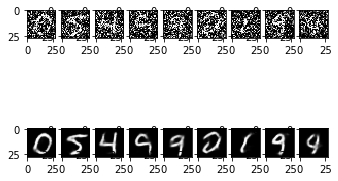

In [22]:
n = 10
for i in range(1,n):
    dig = 100 + i
    sample_img = x_test[dig]
    sample_img_n = x_test_n[dig]
    plt.subplot(2,n,i)
    plt.imshow(sample_img_n.reshape((28,28)))
    f = autoencoder.predict(sample_img_n.reshape(1,28,28,1))
    plt.subplot(2,n,i+n)
    plt.imshow(f.reshape(28,28))
plt.show()